In [2]:
import re

from utils.soup import getSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
page = 'https://www.atptour.com/en/rankings/singles'
    
soup = getSoup(page)

In [4]:
table = soup.find_all("table")
league_table = table[0]
players = league_table.find_all("tr")

In [5]:
player_data = []
for player in players[1::]:
    
    stats = player.find_all("td") 
    rank = int(stats[0].text.strip())
    rank_change = stats[1].text.strip()
    country = stats[2].img["alt"]
    name = stats[3].text.strip()
    age = int(stats[4].text.strip())
    points = int(stats[5].text.strip().replace(',',""))
    points_change = stats[6].text.strip()
    tourn_played = int(stats[7].text.strip())
    dropping = int(stats[8].text.strip())
    next_best = int(stats[9].text.strip())
    
    player_data.append([rank, rank_change, country, name, age, points, points_change, tourn_played, dropping, next_best])

In [6]:
df = pd.DataFrame(player_data)
df.rename({
    0:'rank',
    1:'rank_change',
    2:'country',
    3:'name',
    4:'age',
    5:'points',
    6:'points_change',
    7:'tourn_played',
    8:'dropping',
    9:'next_best'
    },
    axis=1,inplace=True)
df

,rank,rank_change,country,name,age,points,points_change,tourn_played,dropping,next_best
0,1,+4,SRB,Novak Djokovic,35,7070,"+2,000",15,0,0
1,2,-1,ESP,Carlos Alcaraz,19,6730,-90,17,0,0
2,3,+1,GRE,Stefanos Tsitsipas,24,6195,+480,23,0,0
3,4,-1,NOR,Casper Ruud,24,5765,+45,24,0,0
4,5,+1,RUS,Andrey Rublev,25,4200,+270,25,0,0
...,...,...,...,...,...,...,...,...,...,...
95,96,-16,AUS,Christopher O'Connell,28,568,-80,27,0,0
96,97,+5,CHI,Alejandro Tabilo,25,556,+9,18,162,0
97,98,-16,RUS,Aslan Karatsev,29,555,-80,30,0,0
98,99,-1,AUT,Dominic Thiem,29,550,-11,24,0,0


Text(0, 0.5, 'number of tournaments played')

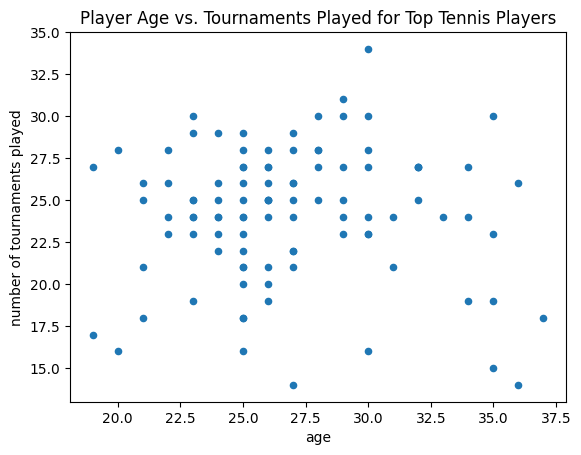

In [7]:
df.plot.scatter(x='age', y='tourn_played')
plt.title('Player Age vs. Tournaments Played for Top Tennis Players')
plt.ylabel('number of tournaments played')

In [28]:
X = df[['age']]
y = df[['tourn_played']]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 1)
(20, 1)
(80, 1)
(20, 1)


In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'Relation between Player Age and # of Tournaments Attended')

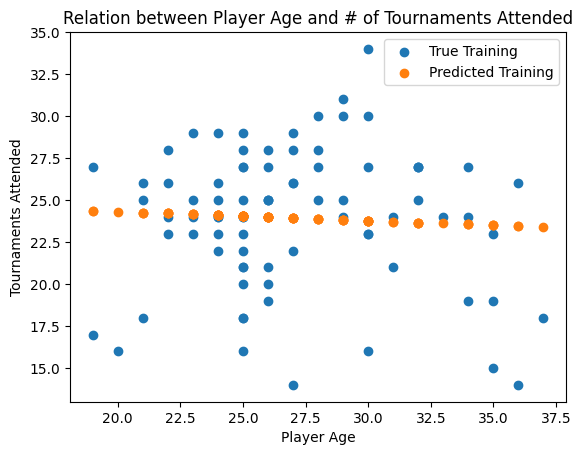

In [42]:
col_name = 'age'

plt.scatter(X_train[col_name], y_train)
plt.scatter(X_train[col_name], model.predict(X_train))

plt.legend(['True Training','Predicted Training'])
plt.xlabel('Player Age')
plt.ylabel('Tournaments Attended')
plt.title("Relation between Player Age and # of Tournaments Attended")